In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator



# Loading Dataset & Normalizing




In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
#data normalization
x_train = x_train/255.0
x_test = x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


# Data augmantation function

In [3]:

datagen = ImageDataGenerator(
    rotation_range=10,      # Rotate images by up to 10 degrees
    zoom_range=0.1,         # Zoom in or out by up to 10%
    width_shift_range=0.1,  # Shift images horizontally by up to 10%
    height_shift_range=0.1, # Shift images vertically by up to 10%
)

datagen.fit(x_train.reshape((-1,28,28,1)))
augmented_train = datagen.flow(x_train.reshape((-1,28,28,1)),y_train,batch_size=32)

# Fit the data generator to the testing data
datagen.fit(x_test.reshape((-1, 28, 28, 1)))
# Create a new iterator for the augmented data
augmented_test = datagen.flow(x_test.reshape((-1, 28, 28, 1)), y_test, batch_size=32)


# **Creating model & Compilation without augmantation**

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#input layer
    keras.layers.Dense(128,activation='relu'),#hidden layer with 128 neurons
    keras.layers.Dense(64,activation='relu'),#hidden layer with 64 neurons
    keras.layers.Dense(32,activation='relu'),#hidden layer with 32 neurons
    keras.layers.Dense(10,activation='softmax')#output layer with 10 neurons
])

model.compile( #model compilation
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
    
)

In [6]:
model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 12s 3ms/step - loss: 0.2559 - accuracy: 0.9233
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1067 - accuracy: 0.9675
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0773 - accuracy: 0.9760
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0593 - accuracy: 0.9808
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0472 - accuracy: 0.9845
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0396 - accuracy: 0.9873
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0342 - accuracy: 0.9884
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0275 - accuracy: 0.9913
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0261 - accuracy: 0.9911
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.02

#  Model data showing

313/313 [==============================] - 1s 2ms/step


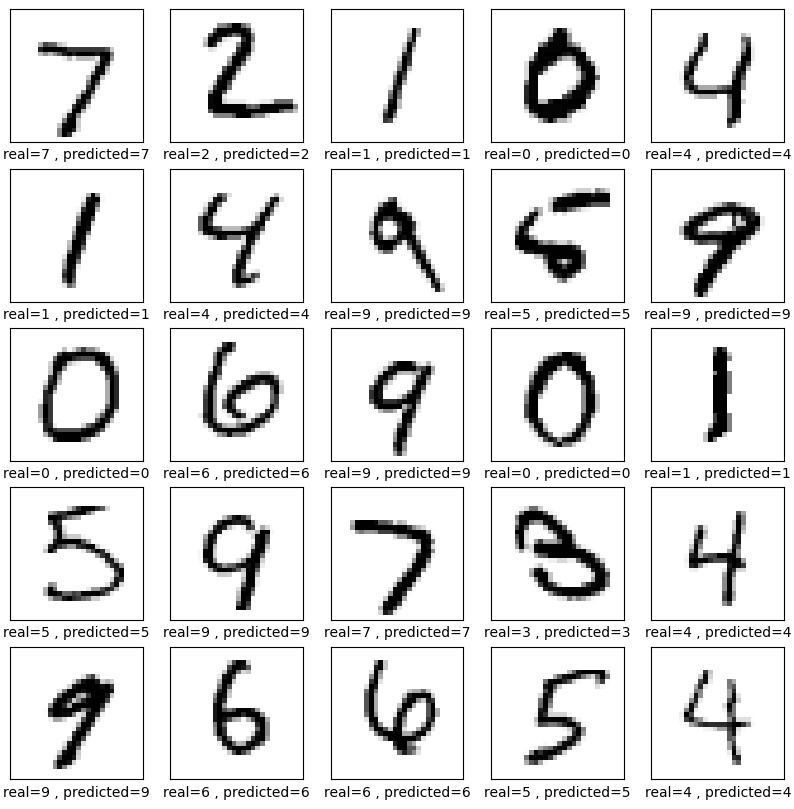

In [7]:

predicted = model.predict(x_test)
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[i],cmap=plt.cm.binary)
  plt.xlabel("real="+str(y_test[i])+" , "+"predicted="+str(np.argmax(predicted[i])))
plt.show()


# **Creating model & Compilation with augmantation**

In [8]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#input layer
    keras.layers.Dense(128,activation='relu'),#hidden layer with 128 neurons
    keras.layers.Dense(64,activation='relu'),#hidden layer with 64 neurons
    keras.layers.Dense(32,activation='relu'),#hidden layer with 32 neurons
    keras.layers.Dense(10,activation='softmax')#output layer with 10 neurons
])

model2.compile( #model compilation
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [9]:
model2.fit(augmented_train,epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 25s 12ms/step - loss: 0.4958 - accuracy: 0.8446
Epoch 2/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2253 - accuracy: 0.9319
Epoch 3/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1851 - accuracy: 0.9435
Epoch 4/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1618 - accuracy: 0.9503
Epoch 5/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1473 - accuracy: 0.9543
Epoch 6/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1398 - accuracy: 0.9574
Epoch 7/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1301 - accuracy: 0.9606
Epoch 8/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1221 - accuracy: 0.9624
Epoch 9/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1175 - accuracy: 0.9642
Epoch 10/15
1875/1875 [==============================] - 23s 12m

# **Showing real and Predicted output**

313/313 [==============================] - 1s 2ms/step


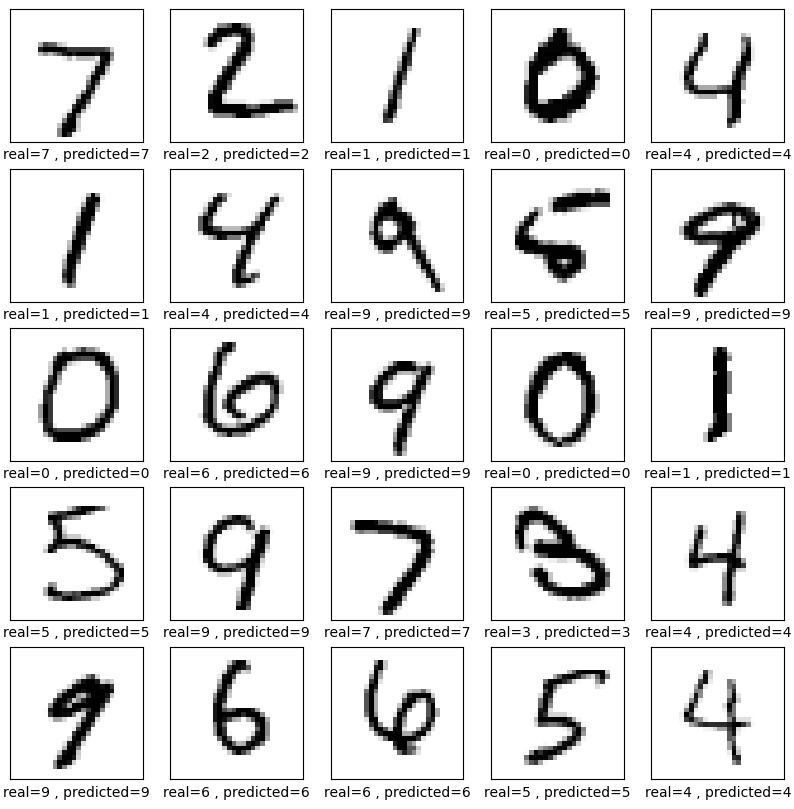

In [10]:
predicted = model2.predict(x_test)

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[i],cmap=plt.cm.binary)
  plt.xlabel("real="+str(y_test[i])+" , "+"predicted="+str(np.argmax(predicted[i])))
plt.show()


# **Model evaluation with augmentation and without augmentation**



In [11]:
print("evaluation of without augmented model")
model.evaluate(x_test,y_test)
model.evaluate(augmented_test)

print("evaluation of augmented model")
model2.evaluate(x_test,y_test) 
model2.evaluate(augmented_test)


evaluation of without augmented model
313/313 [==============================] - 4s 11ms/step - loss: 1.9148 - accuracy: 0.7539
evaluation of augmented model
313/313 [==============================] - 7s 23ms/step - loss: 0.0954 - accuracy: 0.9707


[0.09538871794939041, 0.9707000255584717]